# Basketball Players' Career Duration

## Objetivo

O objetivo deste notebook é explorar a contrução de uma Rede Neural do zero utilizando o pytorch. O modelo em questão avalia classifica 0, se a carreira de um jogador de basquete irá durar menos de 5 anos, e 1 se a carreira durar 5 ou mais anos.

# Dado

O DataFrame possuí as seguintes colunas:
>gp: Número de jogos disputados.

>min: Número de minutos jogados por partida.

>pts: Número médio de pontos por partida.

>fgm: Número médio de arremessos convertidos por partida.

>fga: Número médio de tentativas de arremesso por partida.

>fg: Percentual médio de arremessos convertidos por partida.

>3p_made: Número médio de arremessos de três pontos convertidos por partida.

>3pa: Número médio de tentativas de arremessos de três pontos por partida.

>3p: Percentual médio de arremessos de três pontos convertidos por partida.

>ftm: Número médio de lances livres convertidos por partida.

>fta: Número médio de tentativas de lances livres por partida.

>ft: Percentual médio de lances livres convertidos por partida.

>oreb: Número médio de rebotes ofensivos por partida.

>dreb: Número médio de rebotes defensivos por partida.

>reb: Número médio total de rebotes por partida.

>ast: Número médio de assistências por partida.

>stl: Número médio de roubos de bola por partida.

>blk: Número médio de bloqueios por partida.

>tov: Número médio de turnovers (perdas de posse de bola) por partida.

>target_5yrs: 1 se a carreira durou pelo menos 5 anos, 0 caso contrário.

In [1]:
import torch
import numpy as np
import pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [2]:
df = pd.read_csv('/kaggle/input/national-basketball-association-nba/nba-players.csv')
df.head(15)

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
5,5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0
6,6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1
7,7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1
8,8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0
9,9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,...,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0


quantity null values

In [3]:
df.isna().sum()

Unnamed: 0     0
name           0
gp             0
min            0
pts            0
fgm            0
fga            0
fg             0
3p_made        0
3pa            0
3p             0
ftm            0
fta            0
ft             0
oreb           0
dreb           0
reb            0
ast            0
stl            0
blk            0
tov            0
target_5yrs    0
dtype: int64

In [4]:
df.describe()

,Unnamed: 0,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,...,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.149627,...,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,386.968991,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.051861,...,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,0.000000,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,334.750000,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,...,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,669.500000,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.200000,...,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,1004.250000,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,...,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,1339.000000,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,...,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


<Axes: >

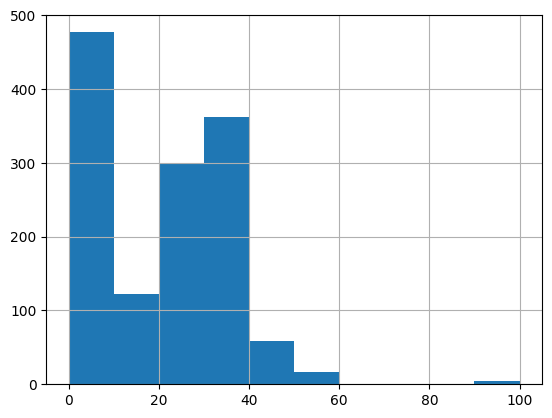

In [5]:
df['3p'].hist()

<Axes: >

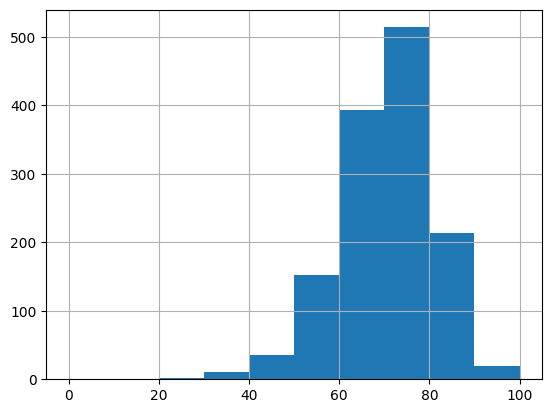

In [6]:
df['ft'].hist()

<Axes: >

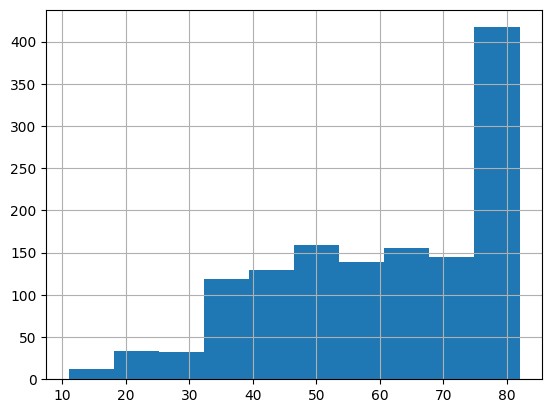

In [7]:
df['gp'].hist()

In [8]:
columns = ['gp', 'min', 'pts', 'fgm', 
           'fga', 'fg', '3p_made', '3pa', 
           'ftm', 'fta', 'ft', 'oreb',
           'dreb', 'reb', 'ast', 'stl',
           'blk', 'tov']

In [10]:
df['target_5yrs'].value_counts()

target_5yrs
1    831
0    509
Name: count, dtype: int64

não preciso de variáveis dummy

## Criando um Modelo Linear

In [11]:
from torch import tensor
t_dep = tensor(df.target_5yrs)
t_indep = tensor(df[columns].values, dtype=torch.float)
t_indep

tensor([[36.0000, 27.4000,  7.4000,  2.6000,  7.6000, 34.7000,  0.5000,  ...,  0.7000,  3.4000,  4.1000,  1.9000,  0.4000,  0.4000,
          1.3000],
        [35.0000, 26.9000,  7.2000,  2.0000,  6.7000, 29.6000,  0.7000,  ...,  0.5000,  2.0000,  2.4000,  3.7000,  1.1000,  0.5000,
          1.6000],
        [74.0000, 15.3000,  5.2000,  2.0000,  4.7000, 42.2000,  0.4000,  ...,  0.5000,  1.7000,  2.2000,  1.0000,  0.5000,  0.3000,
          1.0000],
        [58.0000, 11.6000,  5.7000,  2.3000,  5.5000, 42.6000,  0.1000,  ...,  1.0000,  0.9000,  1.9000,  0.8000,  0.6000,  0.1000,
          1.0000],
        [48.0000, 11.5000,  4.5000,  1.6000,  3.0000, 52.4000,  0.0000,  ...,  1.0000,  1.5000,  2.5000,  0.3000,  0.3000,  0.4000,
          0.8000],
        [75.0000, 11.4000,  3.7000,  1.5000,  3.5000, 42.3000,  0.3000,  ...,  0.2000,  0.7000,  0.8000,  1.8000,  0.4000,  0.0000,
          0.7000],
        [62.0000, 10.9000,  6.6000,  2.5000,  5.8000, 43.5000,  0.0000,  ...,  0.5000,  1.4000

In [12]:
t_indep.shape

torch.Size([1340, 18])

In [13]:
torch.manual_seed(42)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)
coeffs

tensor([0.8823, 0.9150, 0.3829, 0.9593, 0.3904, 0.6009, 0.2566, 0.7936, 0.9408, 0.1332, 0.9346, 0.5936, 0.8694, 0.5677, 0.7411, 0.4294,
        0.8854, 0.5739])

In [14]:
t_indep*coeffs

tensor([[   31.7617,    25.0711,     2.8332,     2.4942,     2.9674,    20.8511,     0.1283,  ...,     0.4155,     2.9560,     2.3276,
             1.4081,     0.1718,     0.3542,     0.7461],
        [   30.8794,    24.6136,     2.7566,     1.9186,     2.6160,    17.7865,     0.1796,  ...,     0.2968,     1.7388,     1.3625,
             2.7420,     0.4723,     0.4427,     0.9182],
        [   65.2879,    13.9996,     1.9909,     1.9186,     1.8351,    25.3578,     0.1026,  ...,     0.2968,     1.4780,     1.2490,
             0.7411,     0.2147,     0.2656,     0.5739],
        [   51.1716,    10.6140,     2.1823,     2.2064,     2.1475,    25.5981,     0.0257,  ...,     0.5936,     0.7825,     1.0787,
             0.5929,     0.2576,     0.0885,     0.5739],
        [   42.3489,    10.5225,     1.7229,     1.5349,     1.1713,    31.4869,     0.0000,  ...,     0.5936,     1.3041,     1.4193,
             0.2223,     0.1288,     0.3542,     0.4591],
        [   66.1702,    10.4310,   

In [15]:
preds = (t_indep*coeffs).sum(axis=1)

In [16]:
preds[:10]

tensor([163.2928, 165.3416, 180.2987, 163.7238, 157.8163, 179.1356, 179.1993, 169.9901, 163.9312, 138.9105])

In [19]:
preds = (t_indep*coeffs).sum(axis=1)
loss = torch.abs(preds-t_dep).mean()
loss

tensor(177.1303)

In [20]:
def calc_preds(coeffs, indeps): 
    return (indeps*coeffs).sum(axis=1)

def calc_loss(coeffs, indeps, deps):
    return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

In [21]:
coeffs.requires_grad_()

tensor([0.8823, 0.9150, 0.3829, 0.9593, 0.3904, 0.6009, 0.2566, 0.7936, 0.9408, 0.1332, 0.9346, 0.5936, 0.8694, 0.5677, 0.7411, 0.4294,
        0.8854, 0.5739], requires_grad=True)

In [22]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(177.1303, grad_fn=<MeanBackward0>)

Vamos realmente calcular loss

In [23]:
loss.backward()

In [24]:
coeffs.grad

tensor([60.4142, 17.6246,  6.8015,  2.6291,  5.8853, 44.1694,  0.2476,  0.7792,  1.2977,  1.8219, 70.3003,  1.0094,  2.0257,  3.0345,
         1.5505,  0.6185,  0.3686,  1.1936])

### Calculando o Gradiente Descendente de Novo

In [25]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([120.8284,  35.2493,  13.6030,   5.2582,  11.7706,  88.3388,   0.4952,   1.5584,   2.5954,   3.6439, 140.6006,   2.0188,   4.0515,
          6.0690,   3.1010,   1.2370,   0.7372,   2.3872])

### Calculando uma época

In [26]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(3112.5879)


## Separação dos Dados

In [27]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [28]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(1072, 268)

## Funções de treinamento da Rede

In [29]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [30]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [31]:
def init_coeffs():
    return (torch.rand(n_coeff)).requires_grad_()

In [32]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(42)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [33]:
coeffs = train_model(20, lr=0.1)

177.531; 921.948; 177.531; 921.948; 177.531; 921.948; 177.531; 921.948; 177.531; 921.948; 177.531; 921.948; 177.531; 921.948; 177.531; 921.948; 177.531; 921.948; 177.531; 921.948; 

In [34]:
def show_coeffs(): return dict(zip(columns, coeffs.requires_grad_(False)))
show_coeffs()

{'gp': tensor(0.8823),
 'min': tensor(0.9150),
 'pts': tensor(0.3829),
 'fgm': tensor(0.9593),
 'fga': tensor(0.3904),
 'fg': tensor(0.6009),
 '3p_made': tensor(0.2566),
 '3pa': tensor(0.7936),
 'ftm': tensor(0.9408),
 'fta': tensor(0.1332),
 'ft': tensor(0.9346),
 'oreb': tensor(0.5936),
 'dreb': tensor(0.8694),
 'reb': tensor(0.5677),
 'ast': tensor(0.7411),
 'stl': tensor(0.4294),
 'blk': tensor(0.8854),
 'tov': tensor(0.5739)}

In [35]:
preds = calc_preds(coeffs, val_indep)

In [36]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([ True,  True, False,  True,  True,  True,  True, False, False, False,  True, False,  True,  True,  True, False])

In [37]:
results.float().mean()

tensor(0.6007)

In [38]:
def acc(coeffs):
    return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.6007)

In [39]:
preds[:28]

tensor([188.4794, 143.8977, 152.6759, 198.5343, 209.6509, 169.1516, 204.2701, 174.9099, 159.3404, 200.3584, 236.3777, 116.2916, 132.6525,
        211.5331, 237.1826, 179.8512, 187.9403, 147.1413, 207.1077, 158.0275, 224.9923, 152.8056, 162.6537, 145.1311, 178.9196, 237.6798,
        157.7237, 252.6304])

In [40]:
def calc_preds(coeffs, indeps):
    return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [41]:
coeffs = train_model(lr=100)

0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 

In [42]:
acc(coeffs), preds[:28]

(tensor(0.6007),
 tensor([188.4794, 143.8977, 152.6759, 198.5343, 209.6509, 169.1516, 204.2701, 174.9099, 159.3404, 200.3584, 236.3777, 116.2916, 132.6525,
         211.5331, 237.1826, 179.8512, 187.9403, 147.1413, 207.1077, 158.0275, 224.9923, 152.8056, 162.6537, 145.1311, 178.9196, 237.6798,
         157.7237, 252.6304]))

In [43]:
show_coeffs()

{'gp': tensor(0.8823),
 'min': tensor(0.9150),
 'pts': tensor(0.3829),
 'fgm': tensor(0.9593),
 'fga': tensor(0.3904),
 'fg': tensor(0.6009),
 '3p_made': tensor(0.2566),
 '3pa': tensor(0.7936),
 'ftm': tensor(0.9408),
 'fta': tensor(0.1332),
 'ft': tensor(0.9346),
 'oreb': tensor(0.5936),
 'dreb': tensor(0.8694),
 'reb': tensor(0.5677),
 'ast': tensor(0.7411),
 'stl': tensor(0.4294),
 'blk': tensor(0.8854),
 'tov': tensor(0.5739)}

In [46]:
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

## Rede Neural com multiplicação de matrix

In [61]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(), const.requires_grad_()

In [62]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [63]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [73]:
## Treinamento da Rede

In [64]:
coeffs = train_model(lr=1.4)

0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 0.375; 

In [65]:
acc(coeffs)

tensor(0.6007)

## Exportando o Modelo

In [72]:
torch.save(coeffs, 'model.pt')